In [51]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import os
from scipy.linalg import block_diag
from utils import make_diagonalizable_matrix, make_positive_semidefinite, plot_loss, plot_loss_sliding, compare_losses, make_diagonalizable_matrix_complex, get_hankel_new, run_multiple_runs, run_multiple_controllers,  plot_runs_with_mean, plot_multiple_controllers, plot_multiple_sliding_losses, run_multiple_models_with_params, plot_multiple_models_with_ci

# PARTIAL OBSERVATIONS:
from lqg import LQG  # new updated
from grc import GRC # new updated
#from PO.GRC.grc_STU import GRC_STU # new updated
# from PO.GRC.grc_new import ModifiedGRC # new updated
#from PO.DSC.dsc_#PO import DSC_PO # new updated (OLD working!)
from dsc_new import DSC_New # new updated (changed after algo change)
#from PO.DSC.dsc_PO_STU import DSC_PO_STU # new updated
# from PO.DOSC.dosc_PO_old import DOSC_PO_old # new updated

# %load_ext autoreload
# %autoreload 2

In [43]:
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

LQG Model Runtime: 0.0970 seconds


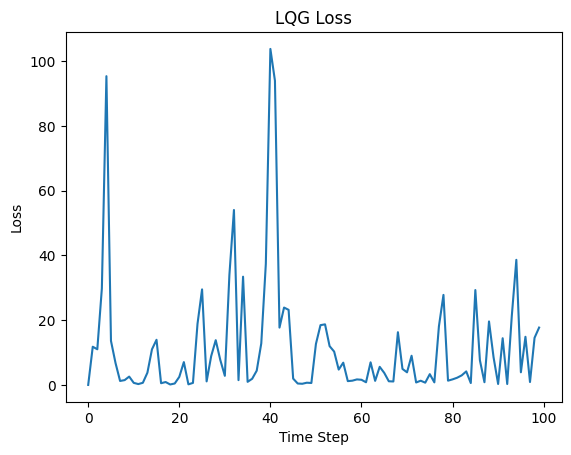

In [362]:
# LQG PO Experiments

# Define system parameters
d, n = 2, 1  # Example dimensions
A = make_diagonalizable_matrix(d)
C = make_diagonalizable_matrix(d)
B = np.random.randn(d, n)
Q = make_positive_semidefinite(d)
R = make_positive_semidefinite(n)

Q_noise = 0.1 * np.eye(d) # Process Noise Covariance
R_noise = 0.1 * np.eye(C.shape[0])  # Measurement Noise Covariance


# PARAMETERS
h = 5         # Number of eigenpairs
eta =  0.001  # Step size
T = 100


lqg_po = LQG(A, B, C, Q, Q_noise, R, R_noise, h, eta, T, name="LQG", nl=False)
# lqg_po_nl = LQG(A, B, C, Q, Q_noise, R, R_noise, h, eta, T, name="LQG", nl=True)
# grc_po_nl = GRC(A, B, C, Q, R, h, eta, T, name="GRC", nl=True)
# grc_po_stu = GRC_STU(A, B, C, Q, R, h, eta, T, name="GRC", nl=True)


start_time = time.time()
lqg_po.run()
end_time = time.time()
print(f"LQG Model Runtime: {end_time - start_time:.4f} seconds")

# start_time = time.time()
# lqg_po_nl.run()
# end_time = time.time()
# print(f"LQG NL Model Runtime: {end_time - start_time:.4f} seconds")

# start_time = time.time()
# grc_po_nl.run()
# end_time = time.time()
# print(f"GRC NL Model Runtime: {end_time - start_time:.4f} seconds")

# start_time = time.time()
# grc_po_stu.run()
# end_time = time.time()
# print(f"GRC STU Model Runtime: {end_time - start_time:.4f} seconds")

# # OSC_NL
# start_time = time.time()
# osc_nl.run()
# end_time = time.time()
# print(f"OSC NL Model Runtime: {end_time - start_time:.4f} seconds")

# OSC_w_STU
# start_time = time.time()
# osc_wstu.run()
# end_time = time.time()
# print(f"OSC_w_STU Modsel Runtime: {end_time - start_time:.4f} seconds")

plot_loss(lqg_po, "LQG Loss")
# plot_loss(lqg_po_nl, "Kalman-LQR NL Loss")


(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'LQG Sliding Loss'}, xlabel='Time Step', ylabel='20-Step Average Loss'>)

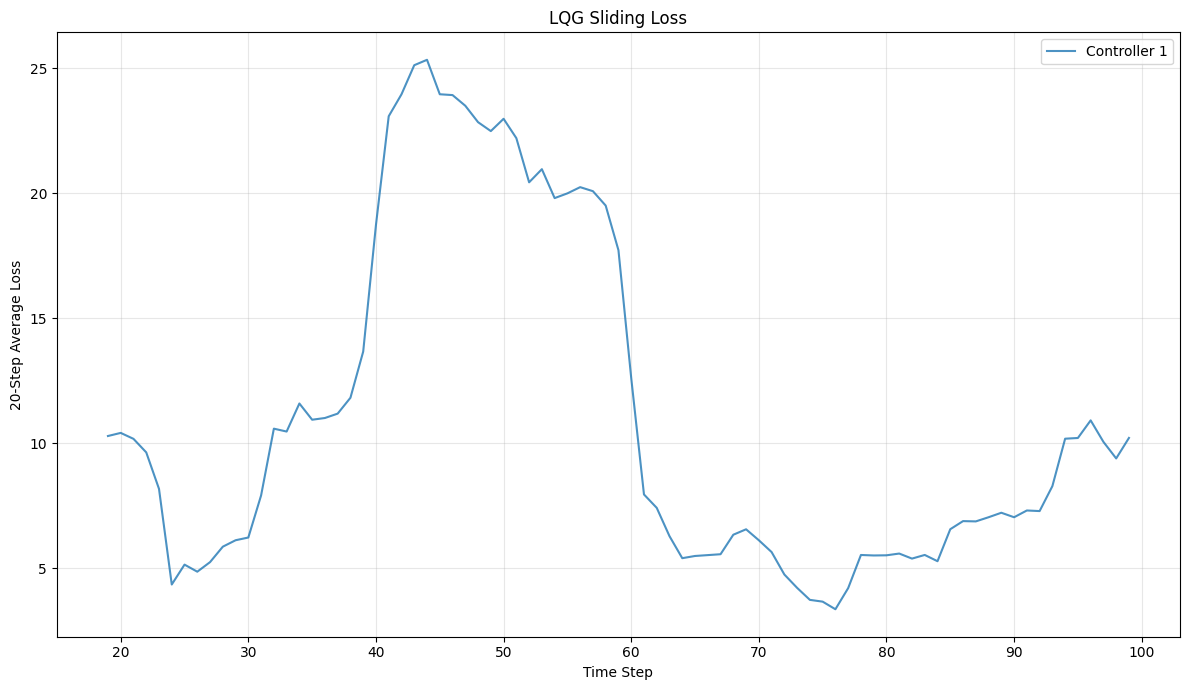

In [363]:
plot_loss_sliding(lqg_po, "LQG Sliding Loss", window_size=20)

GRC Model Runtime: 1.3394 seconds


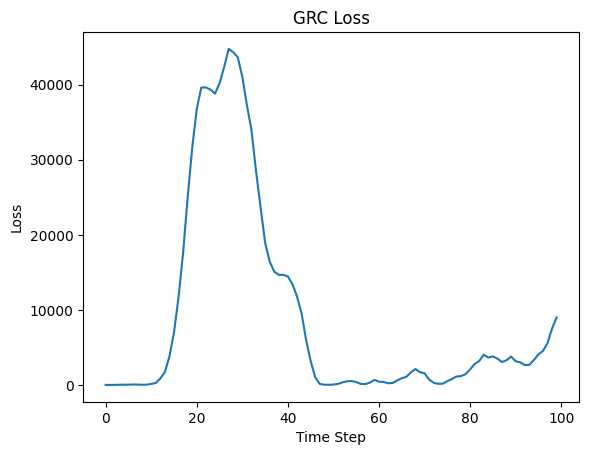

In [364]:
# GRC PO Experiments

# Define system parameters
d, n = 2, 1  # Example dimensions
# A = make_diagonalizable_matrix(d)
# C = make_diagonalizable_matrix(d)
# B = np.random.randn(d, n)
# Q = make_positive_semidefinite(d)
# R = make_positive_semidefinite(n)


# Base dimensions
# dx_base, du_base = 2, 1
# blocks = 5  # So final dx = 2 * 5 = 10, du = 1 * 5 = 5

# # Define small system matrices
# A_small = np.array([[1.0, 1.0], [0.0, 1.0]])
# B_small = np.array([[0.0], [1.0]])
# Q_small = np.eye(dx_base)
# R_small = np.eye(du_base)

# # Create block-diagonal matrices
# A = block_diag(*([A_small] * blocks))     # Shape (10, 10)
# B = block_diag(*([B_small] * blocks))     # Shape (10, 5)
# Q = block_diag(*([Q_small] * blocks))     # Shape (10, 10)
# R = block_diag(*([R_small] * blocks))     # Shape (5, 5)


# PARAMETERS
h = 5         # Number of eigenpairs
eta =  0.001  # Step size
T = 100


grc_po = GRC(A, B, C, Q, R, h, eta, T, name="GRC", nl=False)
# grc_po_nl = GRC(A, B, C, Q, R, h, eta, T, name="GRC", nl=True)
# grc_po_stu = GRC_STU(A, B, C, Q, R, h, eta, T, name="GRC", nl=True)


# # GRC
start_time = time.time()
grc_po.run()
end_time = time.time()
print(f"GRC Model Runtime: {end_time - start_time:.4f} seconds")

# start_time = time.time()
# grc_po_nl.run()
# end_time = time.time()
# print(f"GRC NL Model Runtime: {end_time - start_time:.4f} seconds")

# start_time = time.time()
# grc_po_stu.run()
# end_time = time.time()
# print(f"GRC STU Model Runtime: {end_time - start_time:.4f} seconds")

# # OSC_NL
# start_time = time.time()
# osc_nl.run()
# end_time = time.time()
# print(f"OSC NL Model Runtime: {end_time - start_time:.4f} seconds")

# OSC_w_STU
# start_time = time.time()
# osc_wstu.run()
# end_time = time.time()
# print(f"OSC_w_STU Model Runtime: {end_time - start_time:.4f} seconds")

plot_loss(grc_po, "GRC Loss")
# plot_loss(grc_po_nl, "GRC NL Loss")
# plot_loss(grc_po_stu, "GRC STU Loss")
# plot_loss(grc_po_new, "GRC new Loss")
# plot_loss(osc_nl, "OSC NL Loss")
# plot_loss(osc_wstu, "OSC STU Loss")

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'GRC Sliding Loss'}, xlabel='Time Step', ylabel='20-Step Average Loss'>)

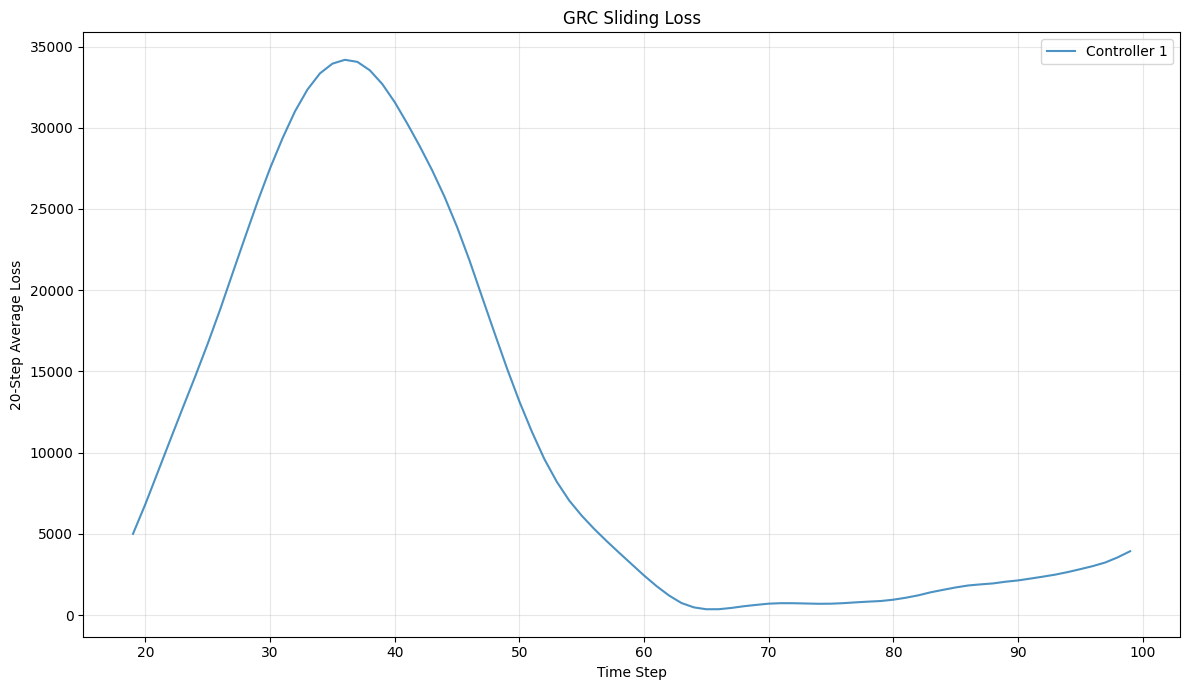

In [365]:
plot_loss_sliding(grc_po, "GRC Sliding Loss", window_size=20)

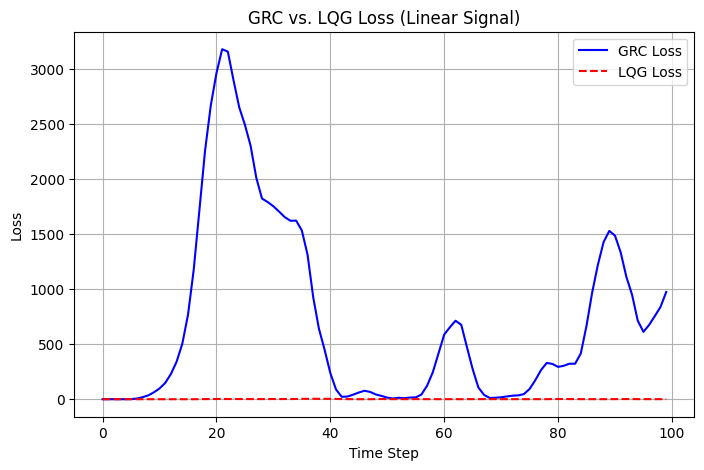

In [16]:
compare_losses([grc_po, lqg_po], "GRC vs. LQG Loss (Linear Signal)")

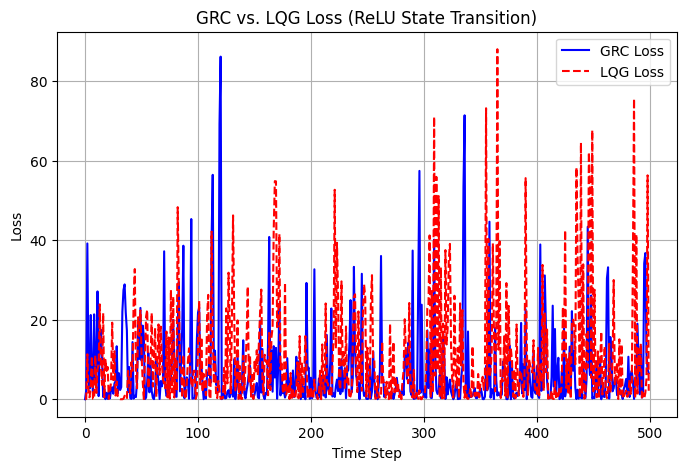

In [ ]:
compare_losses([grc_po_nl, lqg_po_nl], "GRC vs. LQG Loss (ReLU State Transition)")

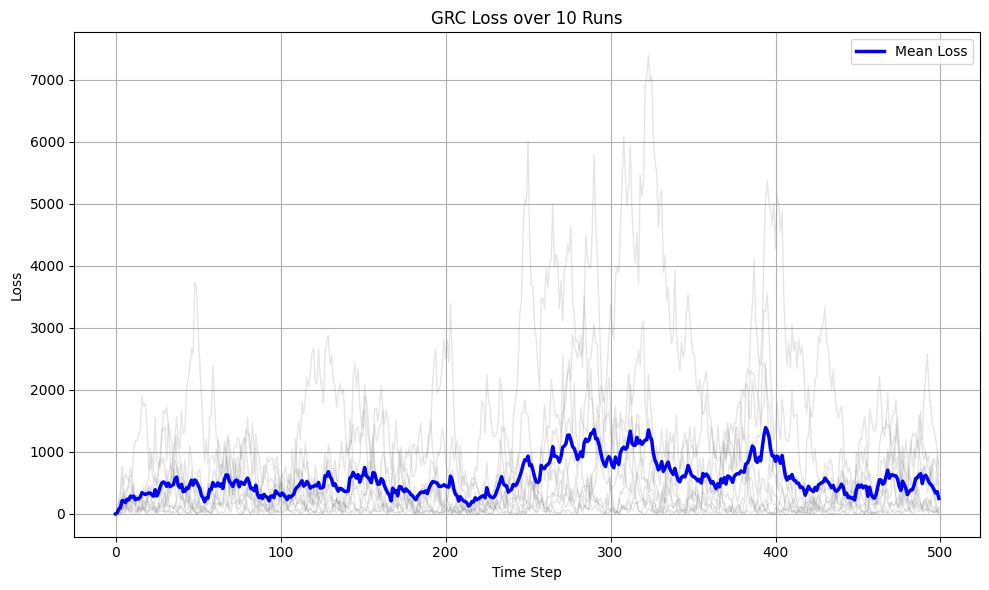

In [ ]:
grc_losses = run_multiple_runs(GRC, num_runs=100, T=500, A=A, B=B, C=C , Q=Q, R=R, h=5, eta=0.001)
plot_runs_with_mean(grc_losses, "GRC Loss over 10 Runs")

DSC Model Runtime: 5.5401 seconds


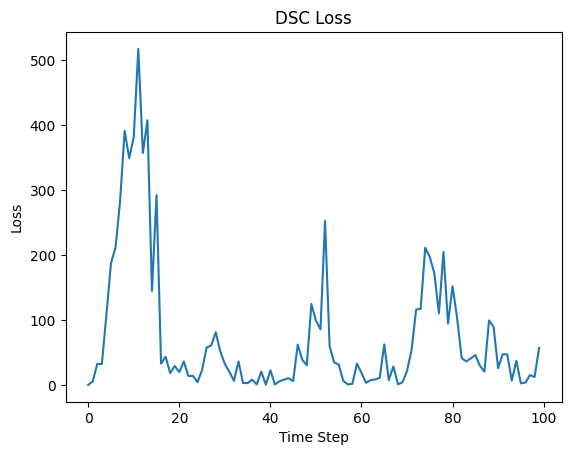

In [366]:
# DSC PO Experiments

# Define system parameters
d, n = 2, 1  # Example dimensions



# PARAMETERS
h = 5         # Number of eigenpairs
H = h
m = 10      # order of log T (for the new Hankel Matrix) (only way I can achieve "going down" if this is large
M = m
gamma = 0.2 # should be very small (less than 2/3 for marginally stable systems)
eta =  0.001  # Step size
T = 100


dsc_po = DSC_New(A, B, C, Q, R, h, H, gamma, eta, T, name="DSC", nl=False)
# dsc_po_nl = DSC_New(A, B, C, Q, R, h, H, gamma, eta, T, name="DSC", nl=True)
# dsc_po_stu = DSC_PO_STU(A, B, C, Q, R, h, H, gamma, eta, T, name="DSC", nl=False)


# DSC
start_time = time.time()
dsc_po.run()
end_time = time.time()
print(f"DSC Model Runtime: {end_time - start_time:.4f} seconds")

# start_time = time.time()
# dsc_po_nl.run()
# end_time = time.time()
# print(f"DSC NL Model Runtime: {end_time - start_time:.4f} seconds")


plot_loss(dsc_po, "DSC Loss")
# plot_loss(dsc_po_nl, "DSC NL Loss")
# plot_loss(dsc_po_stu, "DSC STU Loss")
# plot_loss(dosc_po_old, "DOSC Old Loss")
# plot_loss(osc_nl, "OSC NL Loss")
# plot_loss(osc_wstu, "OSC STU Loss")

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'DSC Sliding Loss'}, xlabel='Time Step', ylabel='20-Step Average Loss'>)

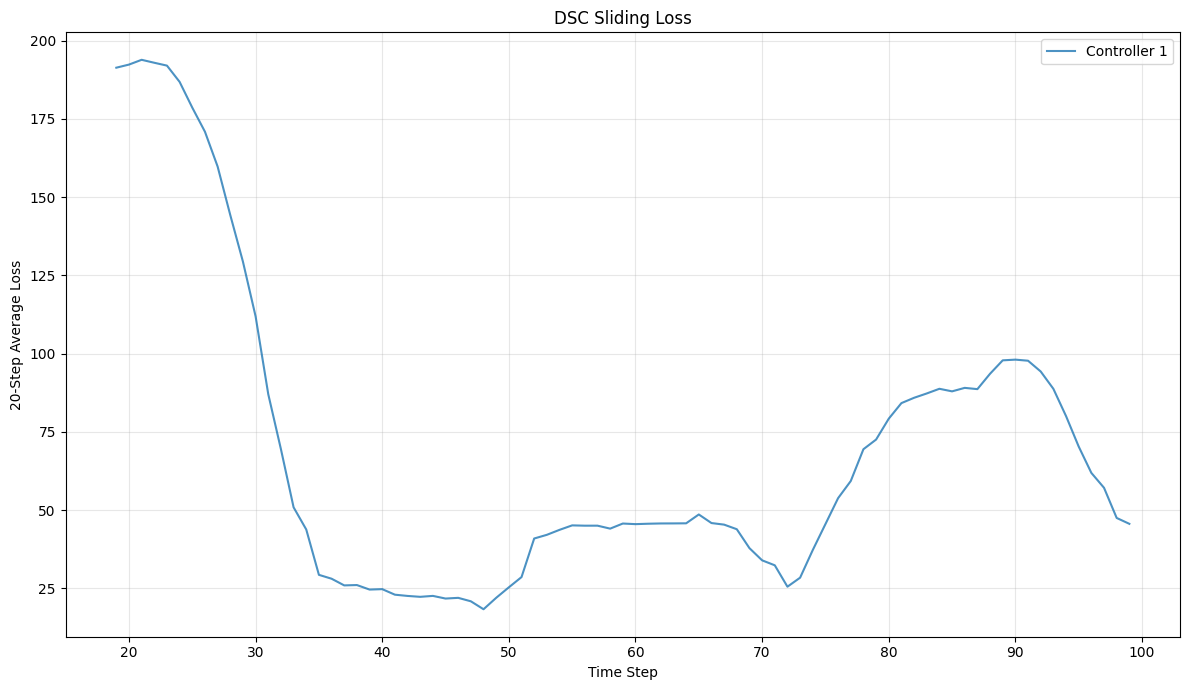

In [367]:
plot_loss_sliding(dsc_po, "DSC Sliding Loss", window_size=20)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'DSC vs. GRC vs. LQG on Linear Signal and Gaussian Noise'}, xlabel='Time Step', ylabel='20-Step Average Loss'>)

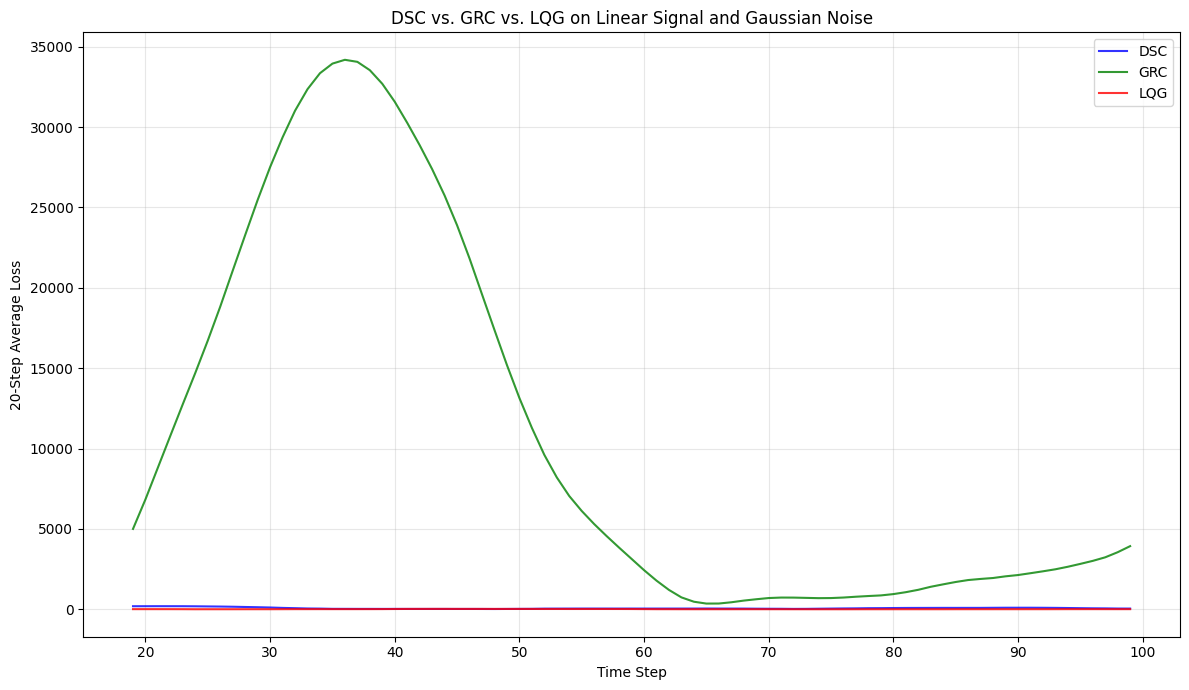

In [368]:
controllers = [dsc_po, grc_po, lqg_po]
labels = ["DSC", "GRC", "LQG"]
colors = ["blue", "green", "red"]
plot_loss_sliding(controllers, "DSC vs. GRC vs. LQG on Linear Signal and Gaussian Noise", window_size=20, labels=labels, colors=colors)  #save_path="PO/figures/dsc/all_sinusoid_linear.png"

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'DSC vs. vs. LQG on Linear Signal and Gaussian Noise'}, xlabel='Time Step', ylabel='20-Step Average Loss'>)

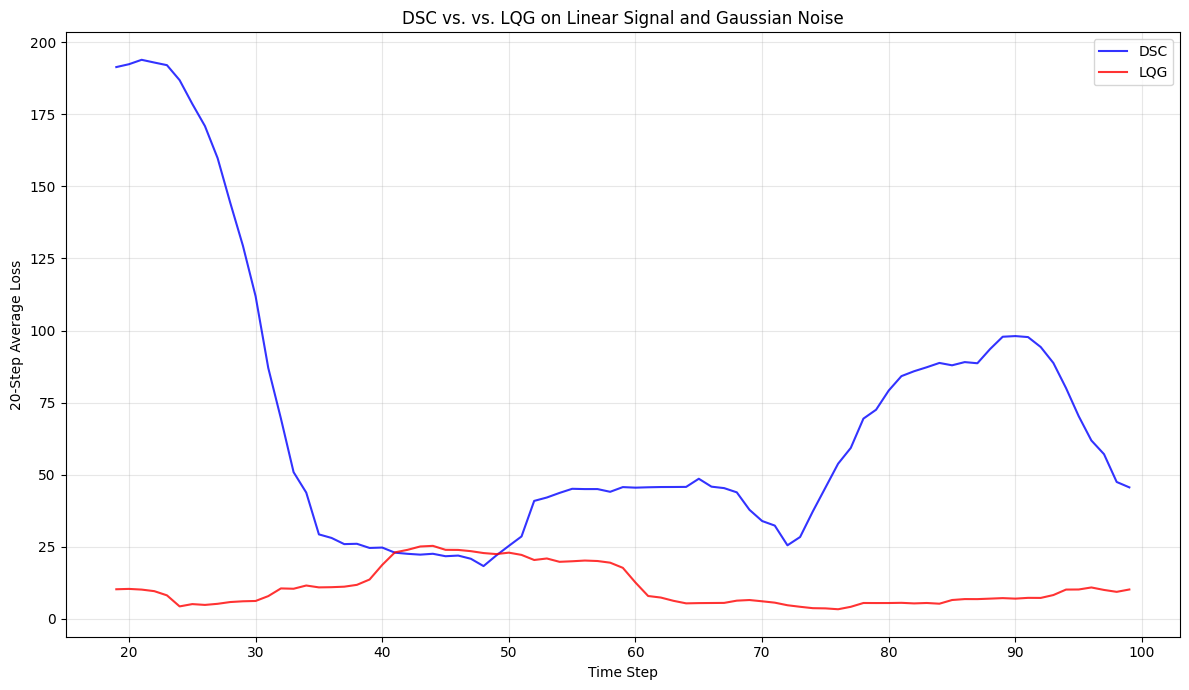

In [369]:
controllers = [dsc_po, lqg_po]
labels = ["DSC", "LQG"]
colors = ["blue", "red"]
plot_loss_sliding(controllers, "DSC vs. vs. LQG on Linear Signal and Gaussian Noise", window_size=20, labels=labels, colors=colors, save_path="loss_plots/dsc_vs_lqg2.pdf") #save_path="loss_plots/dsc_vs_lqg.pdf")

In [235]:
from google.colab import files
files.download("loss_plots/dsc_vs_lqg2.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dsc_losses = run_multiple_runs(DSC_New, num_runs=100, T=500, A=A, B=B, C=C , Q=Q, R=R, h=5, H =5 , gamma = 0.1, eta=0.001)
plot_runs_with_mean(dsc_losses, "DSC Loss over 100 Runs")

KeyboardInterrupt: 

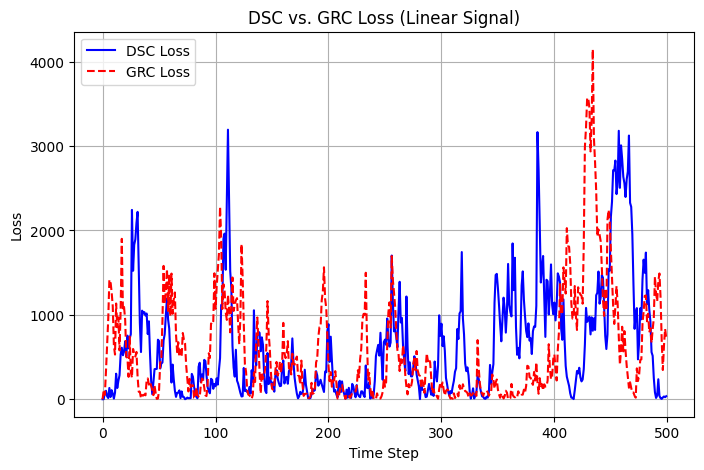

In [ ]:
compare_losses([dsc_po, grc_po], "DSC vs. GRC Loss (Linear Signal)")

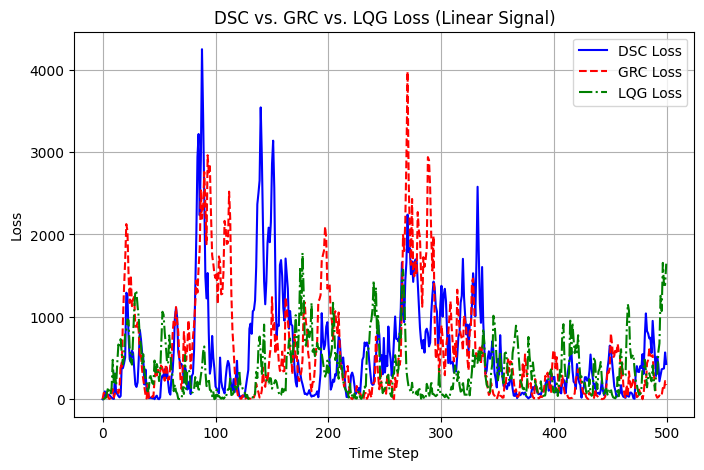

In [ ]:
compare_losses([dsc_po, grc_po, lqg_po], "DSC vs. GRC vs. LQG Loss (Linear Signal)", save_path="PO/figures/dsc_vs_gpc_vs_KF_loss4.png")


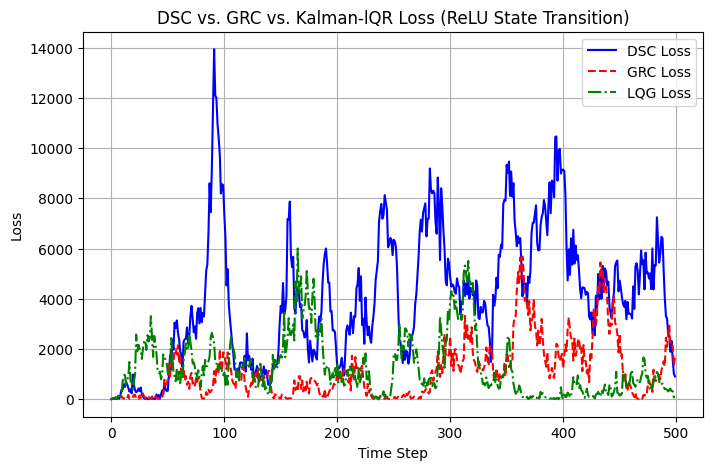

In [ ]:
compare_losses([dsc_po_nl, grc_po_nl, lqg_po_nl], "DSC vs. GRC vs. Kalman-lQR Loss (ReLU State Transition)", save_path="PO/figures/dsc/dsc_vs_gpc_vs_KF_relu_gauss2.png")


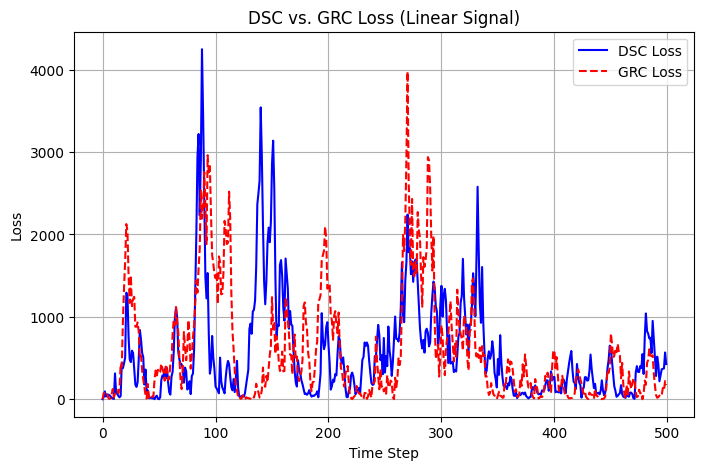

In [ ]:
compare_losses([dsc_po, grc_po], "DSC vs. GRC Loss (Linear Signal)", save_path="PO/figures/dsc_vs_gpc_loss.png")

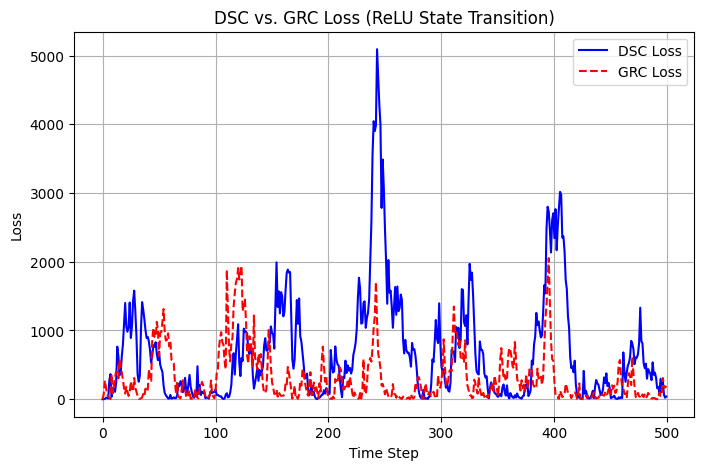

In [ ]:
compare_losses([dsc_po_nl, grc_po_nl], "DSC vs. GRC Loss (ReLU State Transition)", save_path="PO/figures/dsc_vs_gpc_loss_relu.png")

Running LQG...
Running GRC...
Running DSC...


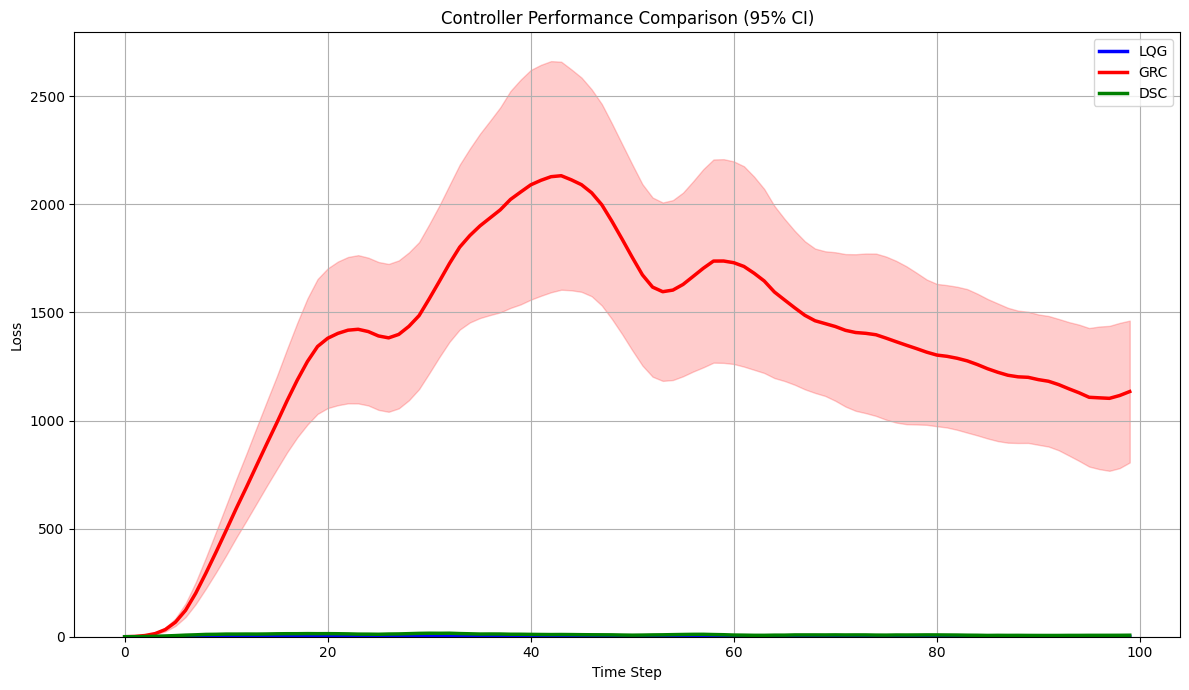

In [34]:
# Define controllers with their specific parameters
controller_configs = [
    ("LQG", LQG, {
        'A': A, 'B': B, 'C': C, 'Q': Q, 'Q_noise': Q_noise, 'R': R,
        'R_noise': R_noise, 'h': h, 'eta': eta, 'T': T, 'nl': False
    }),
    ("GRC", GRC, {
        'A': A, 'B': B, 'C': C, 'Q': Q, 'R': R, 'h': h, 'eta': eta,
        'T': T, 'nl': False
    }),
    ("DSC", DSC_New, {
        'A': A, 'B': B, 'C': C, 'Q': Q, 'R': R, 'h': h, 'H': H,
        'gamma': gamma, 'eta': eta, 'T': T, 'nl': False
    })
]

# Run all controllers with their specific parameters
all_results = run_multiple_models_with_params(
    controller_configs,
    num_runs=100,
    seed_base=0
)

# Define custom colors (optional)
custom_colors = {
    "LQG": "blue",
    "GRC": "red",
    "DSC": "green"
}

# Plot all results with confidence intervals
plot_multiple_models_with_ci(
    all_results,
    "Controller Performance Comparison (95% CI)",
    colors=custom_colors,
    ylim=(0, None)  # Optional: set minimum y-axis value to 0
)